##Importing Packages

In [ ]:
'''
import torch
import torch.nn as nn
import torchvision
'''
import open3d as o3d
import trimesh
import matplotlib.pyplot as plt
import numpy as np

##Directories

In [ ]:
# Load the .ply file
ply_file1_path = '/content/drive/MyDrive/In Mind/Session11_8 9/pcs/1.ply'
mesh = trimesh.load(ply_file1_path)

(-604.9186548216951,
 402.46134517830507,
 -81.37772615214186,
 249.17227384785818)

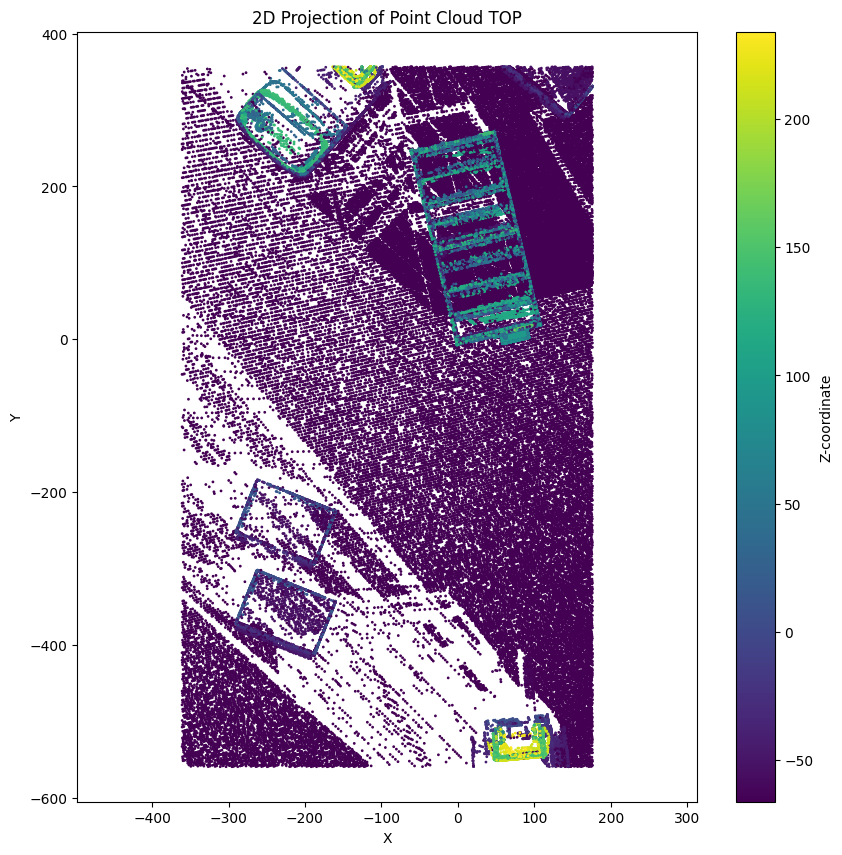

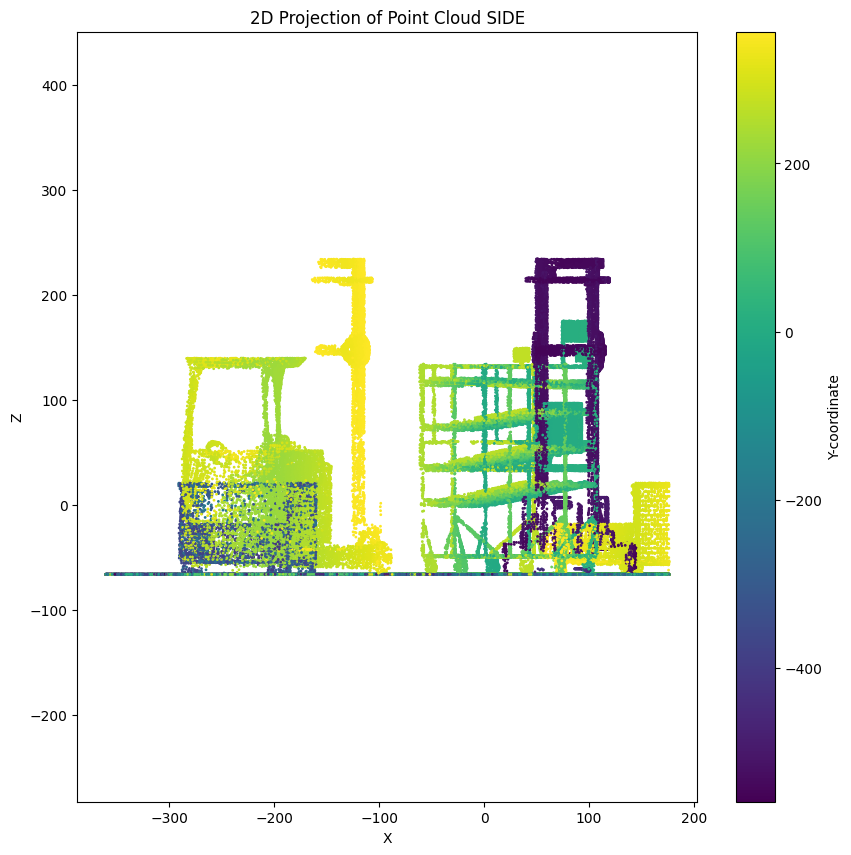

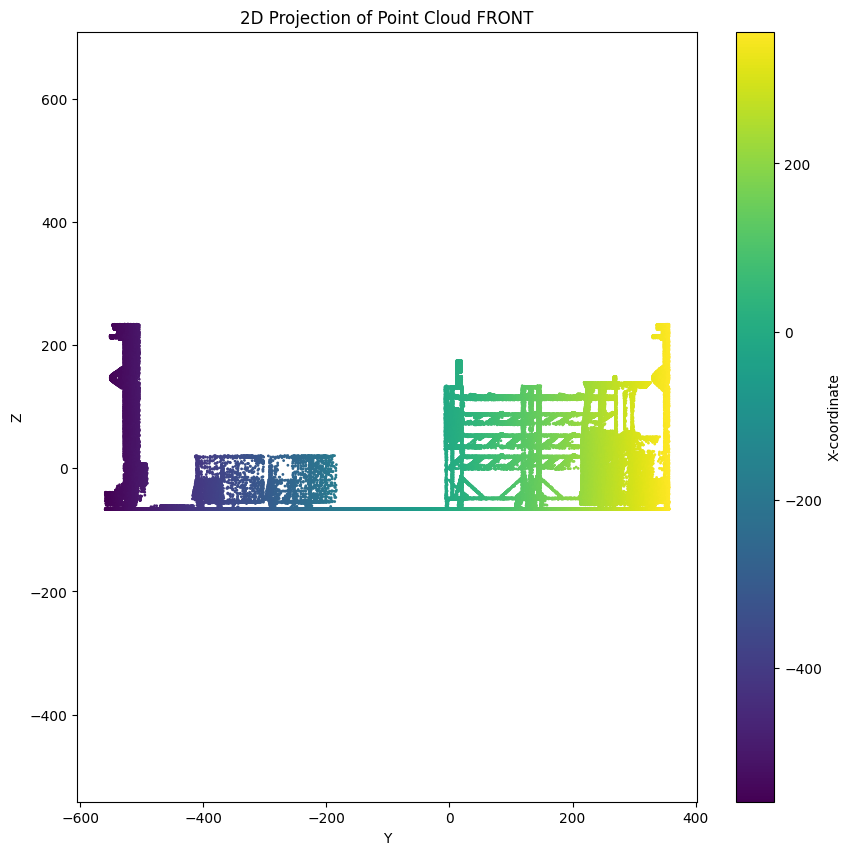

In [ ]:
# Extract point cloud
points = mesh.vertices

# Create a 2D projection
x, y, z = points.T
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=z, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='Z-coordinate')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Projection of Point Cloud TOP')
plt.axis('equal')

plt.figure(figsize=(10, 10))
plt.scatter(x, z, c=y, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='Y-coordinate')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('2D Projection of Point Cloud SIDE')
plt.axis('equal')

plt.figure(figsize=(10, 10))
plt.scatter(y, z, c=y, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='X-coordinate')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('2D Projection of Point Cloud FRONT')
plt.axis('equal')

##Finding min and max

In [ ]:
# Compute minimum and maximum XYZ coordinates
min_xyz = points.min(axis=0)
max_xyz = points.max(axis=0)

print(f"Minimum XYZ coordinates: {min_xyz}")
print(f"Maximum XYZ coordinates: {max_xyz}")

Minimum XYZ coordinates: [-360.79576735 -559.12865482  -66.35272615]
Maximum XYZ coordinates: [176.20423265 356.67134518 234.14727385]


##Color decrease

(-604.9186548216951,
 402.46134517830507,
 -81.37772615214186,
 249.17227384785818)

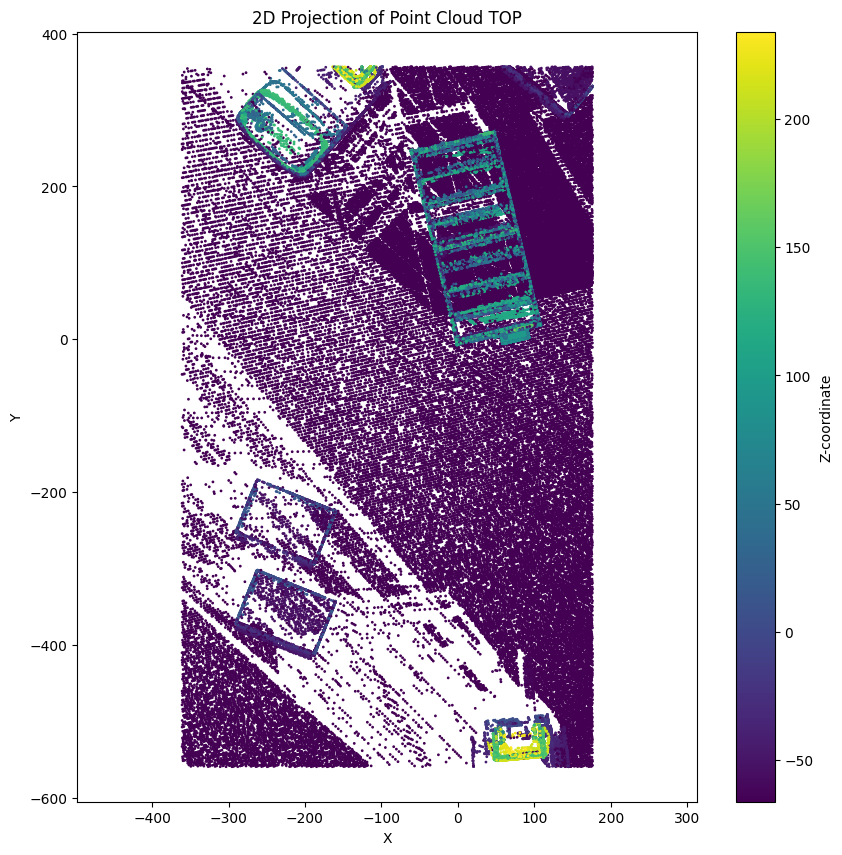

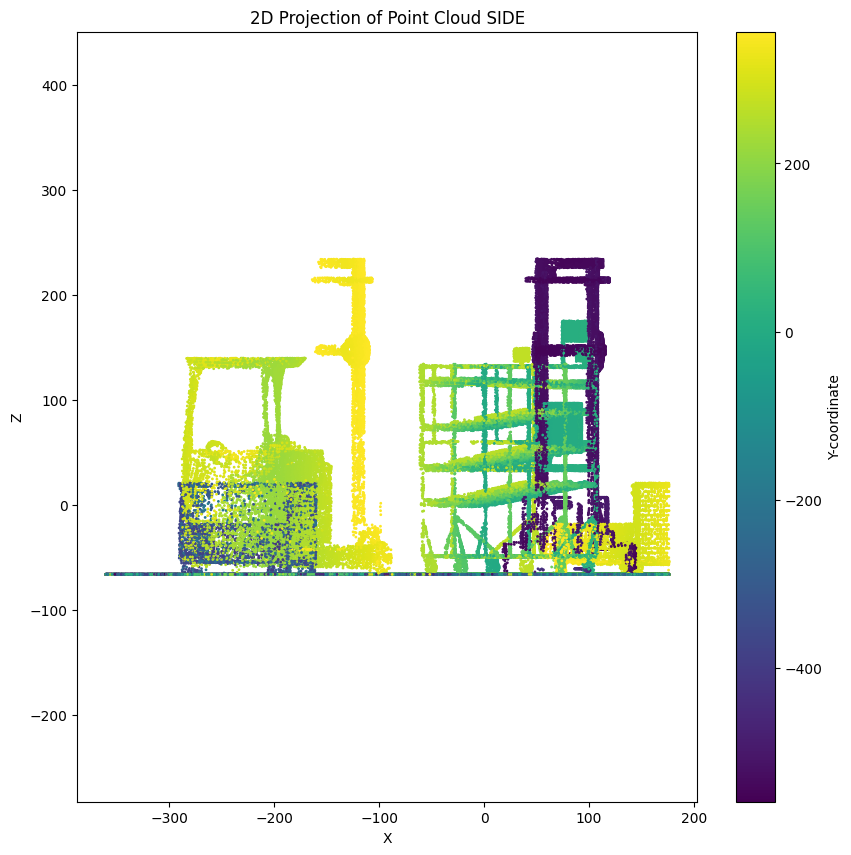

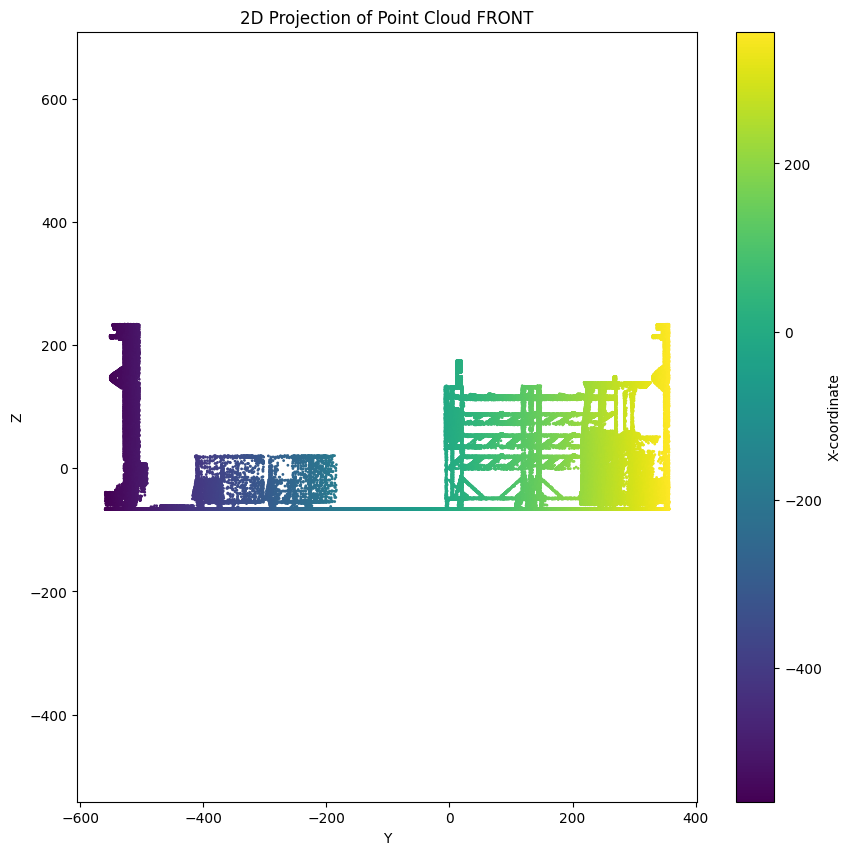

In [ ]:
# Load the .ply file
pcd = o3d.io.read_point_cloud(ply_file1_path)

# Convert to numpy array
points = np.asarray(pcd.points)

# Compute center of the point cloud
center = np.mean(points, axis=0)

# Compute distances from the center
distances = np.linalg.norm(points - center, axis=1)

# Normalize distances to range [0, 1]
normalized_distances = (distances - distances.min()) / (distances.max() - distances.min())

# Apply a non-linear transformation to exaggerate the effect
# Example: Exponentially scale the distances to enhance contrast
exaggeration_factor = 2.0  # Adjust this factor for more or less contrast
transformed_distances = np.power(normalized_distances, exaggeration_factor)

# Map distances to colors: 100% intensity (white) to 40% intensity (gray)
# Use a more noticeable gradient effect
colors = np.vstack([1 - 1 * transformed_distances, 1 - 1 * transformed_distances, 1 - 1 * transformed_distances]).T

# Apply colors to the point cloud
pcd.colors = o3d.utility.Vector3dVector(colors)


# Convert to numpy array
center_dec_points = np.asarray(pcd.points)

# Create a 2D projection
x, y, z = center_dec_points.T
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=z, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='Z-coordinate')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Projection of Point Cloud TOP')
plt.axis('equal')

plt.figure(figsize=(10, 10))
plt.scatter(x, z, c=y, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='Y-coordinate')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('2D Projection of Point Cloud SIDE')
plt.axis('equal')

plt.figure(figsize=(10, 10))
plt.scatter(y, z, c=y, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='X-coordinate')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('2D Projection of Point Cloud FRONT')
plt.axis('equal')

##Augmentations

In [ ]:
def drop_points(self, keep_perc):


(-604.9186548216951,
 402.46134517830507,
 -81.37772615214186,
 249.17227384785818)

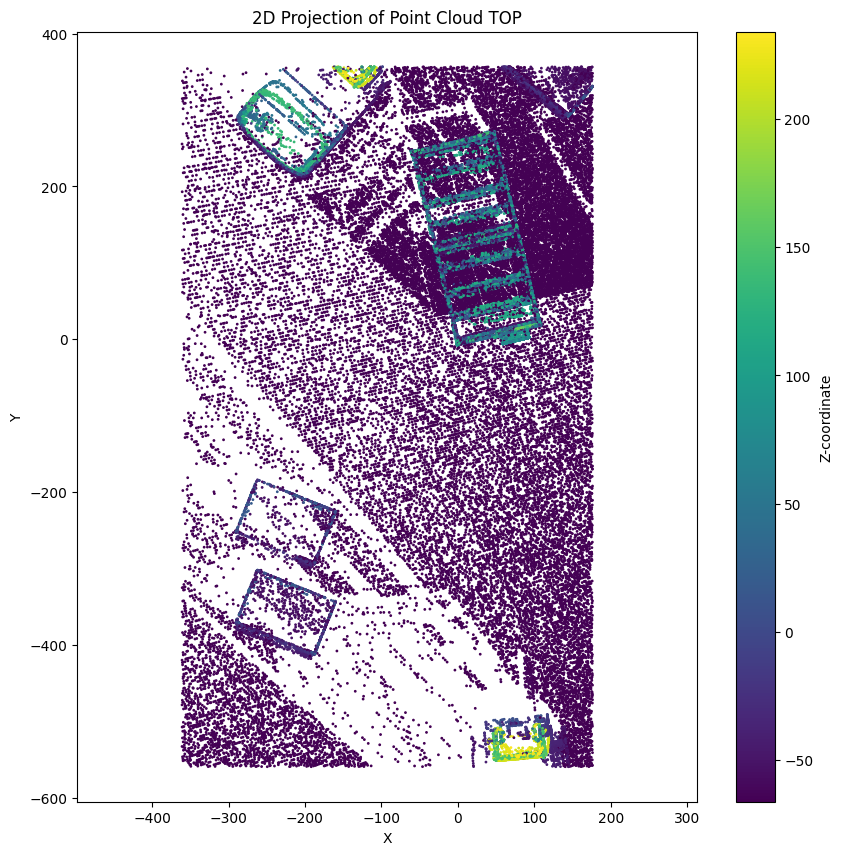

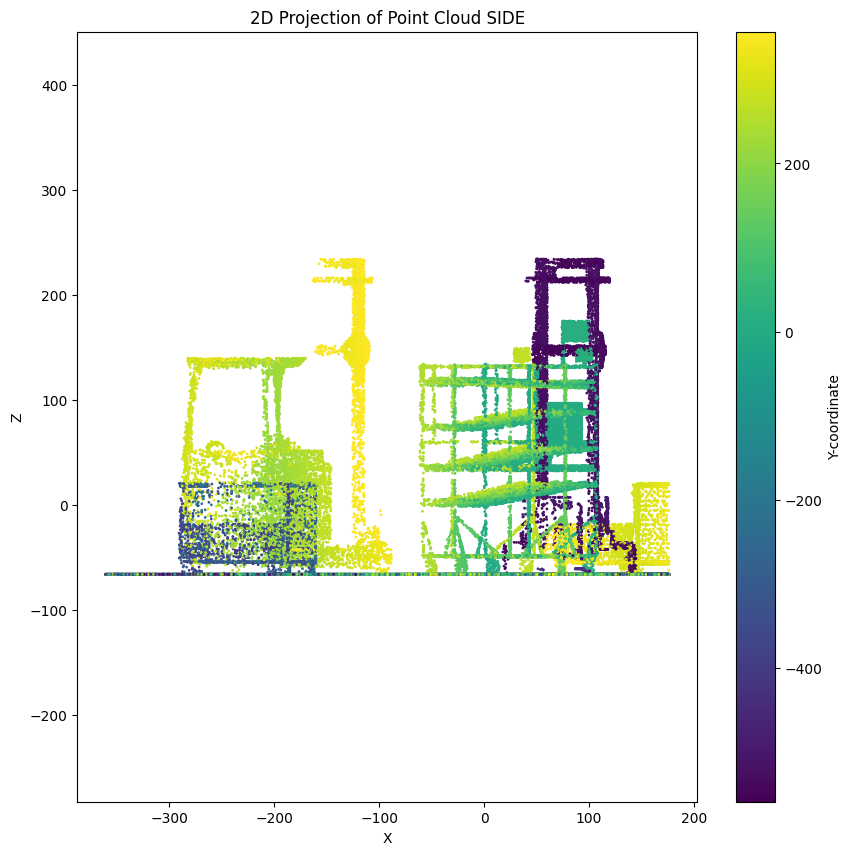

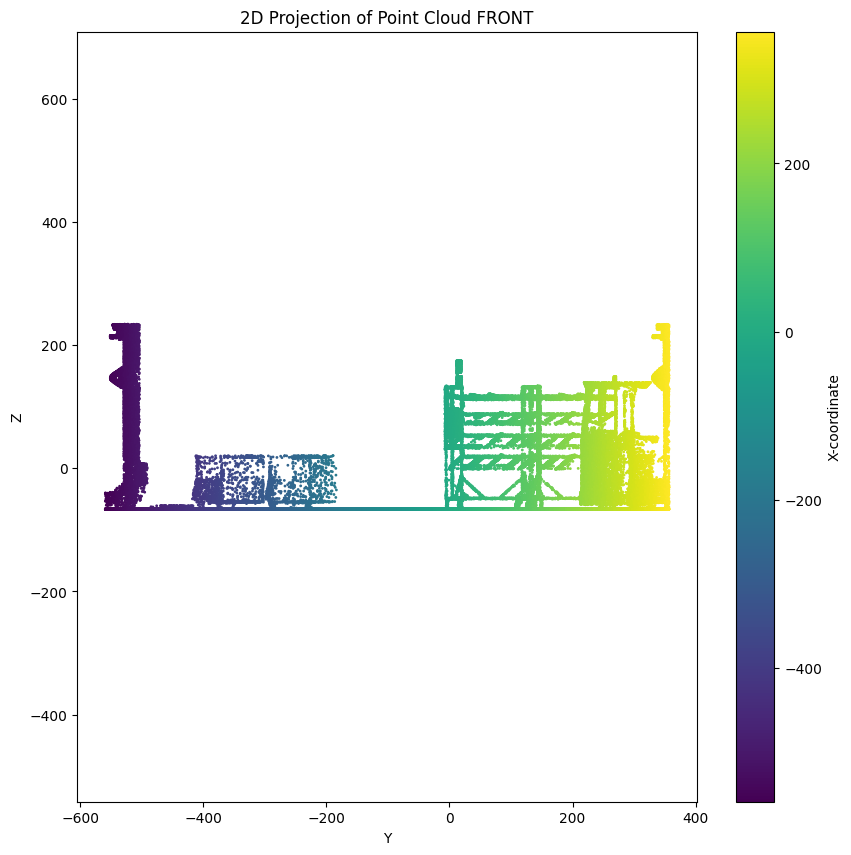

In [ ]:
# Load the .ply file
pcd = o3d.io.read_point_cloud(ply_file1_path)

# Convert to numpy array
points = np.asarray(pcd.points)

# Define the fraction of points to keep (e.g., keep 50% of points)
keep_fraction = 0.5

# Calculate the number of points to keep
num_points = len(points)
num_points_to_keep = int(keep_fraction * num_points)

# Randomly select indices to keep
indices = np.random.choice(num_points, num_points_to_keep, replace=False)

# Create a new point cloud with only the selected points
new_points = points[indices]

# Create a 2D projection
x, y, z = new_points.T
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=z, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='Z-coordinate')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Projection of Point Cloud TOP')
plt.axis('equal')

plt.figure(figsize=(10, 10))
plt.scatter(x, z, c=y, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='Y-coordinate')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('2D Projection of Point Cloud SIDE')
plt.axis('equal')

plt.figure(figsize=(10, 10))
plt.scatter(y, z, c=y, cmap='viridis', s=1)  # Use color mapping to reflect depth or other dimensions
plt.colorbar(label='X-coordinate')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('2D Projection of Point Cloud FRONT')
plt.axis('equal')